# Clustering Analysis using scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("iris.csv")

In [51]:
my_data=data.values

In [6]:
# # getting data in the form of numpy arrays
# from numpy import genfromtxt
# my_data = genfromtxt('iris.csv', delimiter=',')

In [60]:
# Removing the name of the species
full_data = my_data[:,:4]
points = my_data[:-10,:4]
new_points = my_data[-10:,:4]

In [8]:
# Importing KMeans
from sklearn.cluster import KMeans

In [9]:
#Initializing model with 3 clusters
model = KMeans(n_clusters=3)

In [23]:
#Fit the model to points
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# Determine the cluster labels of new_points (Test set)
labels = model.predict(new_points)

In [25]:
print(labels)

[2 2 0 2 2 2 0 2 2 0]


#### Visualizing the predicted labels

In [21]:
import matplotlib.pyplot as plt

In [26]:
xs = new_points[:,0]
ys = new_points[:,1]

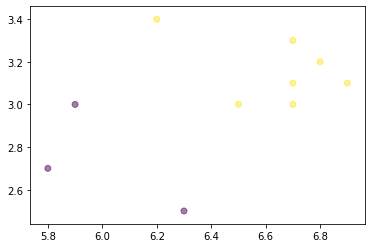

In [28]:
plt.scatter(xs, ys, c=labels,alpha=0.5)
plt.show()

In [30]:
#Compute the coordinates of the centroids
centroids=model.cluster_centers_

In [31]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

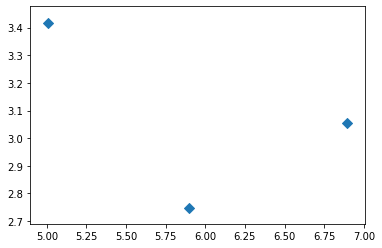

In [32]:
plt.scatter(centroids_x,centroids_y, marker='D', s=50)
plt.show()

In [33]:
xs_train = points[:,0]
ys_train = points[:,1]

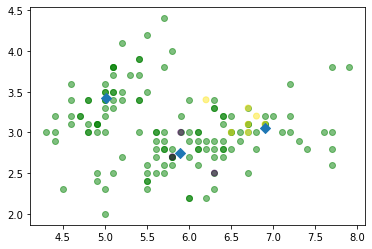

In [38]:
plt.scatter(xs_train, ys_train,alpha=0.5, c='green')
plt.scatter(xs, ys, c=labels,alpha=0.5)
plt.scatter(centroids_x,centroids_y, marker='D', s=50)
plt.show()

### Evaluating the cluster with Cross Tab (if the labels are given)

In [71]:
species_test = my_data[-10:,4]

In [72]:
df = pd.DataFrame({'labels': labels, 'species':species_test})

In [73]:
print(df)

   labels         species
0       2  Iris-virginica
1       2  Iris-virginica
2       0  Iris-virginica
3       2  Iris-virginica
4       2  Iris-virginica
5       2  Iris-virginica
6       0  Iris-virginica
7       2  Iris-virginica
8       2  Iris-virginica
9       0  Iris-virginica


In [74]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  Iris-virginica
labels                 
0                     3
2                     7


### In most cases, the labels are not given, so how do we evaluate the quality of that clustering?

Inertia measures cluster quality.

-It measures how spread out the clusters are (lower is better)

-Distance of each sample from centroid of its cluster

-Choose an elbow in the inertia plot

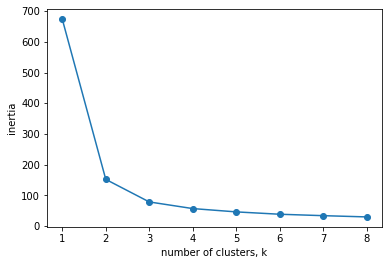

In [70]:
#choosing a good number of clusters for a dataset using the k-means inertia graph
ks = range(1,9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    # Fit model to samples
    model.fit(full_data)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Seems like 3 is the best number of clusters

In [79]:
#easy way to fit and call labels
model_full = KMeans(n_clusters=3)

## Convenience method; equivalent to calling fit(X) followed by predict(X).
labels_full = model_full.fit_predict(full_data)
species = my_data[:,4]

# Create a DataFrame with labels and species as columns: df
df_full = pd.DataFrame({'labels': labels_full, 'species': species})

##Cross tab analysis
ct_full = pd.crosstab(df_full['labels'],df_full['species'])
print(ct_full)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              14
1                 49                0               0
2                  0                2              36


## Transforming features for better clustering